In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def gather_record(key=''):
    filenames = os.listdir()
    record = []
    for fn in filenames:
        if '.csv' in fn and key in fn:
            tmp_record = np.loadtxt(fn,delimiter=',')
            tmp_record = tmp_record[tmp_record[:,-1]>0]
            record.append(tmp_record)
    record = np.concatenate(record,axis=0)
    return record
record = gather_record('record2_2018')
print(record.shape)
print(record[np.argmax(record[:,-1])])

(311, 7)
[1.00000000e-03 1.00000000e+00 3.16227766e+02 1.00000000e-01
 2.00000000e+00 1.00000000e+00 9.89400000e-01]


In [3]:
index2name = ['lr','norm_flag','gamma','lam','max_type','optim_type']
name2index = {n:i for i,n in enumerate(index2name)}
print(index2name)
print(name2index)

['lr', 'norm_flag', 'gamma', 'lam', 'max_type', 'optim_type']
{'lr': 0, 'norm_flag': 1, 'gamma': 2, 'lam': 3, 'max_type': 4, 'optim_type': 5}


In [4]:
tmp_record = record[record[:,4]==2]
print(tmp_record[np.argmax(tmp_record[:,-1])])

[1.00000000e-03 1.00000000e+00 3.16227766e+02 1.00000000e-01
 2.00000000e+00 1.00000000e+00 9.89400000e-01]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fab01a67668>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab01a67cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab01a67518>,
 'medians': [<matplotlib.lines.Line2D at 0x7fab01a773c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab01a77710>,
 'means': []}

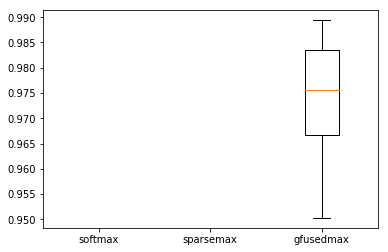

In [6]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#box plot
index = name2index['max_type']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['softmax','sparsemax','gfusedmax'])

(155, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fab01a00400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab01a00a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab01a002b0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fab01a0b160>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab01a0b4a8>,
 'means': []}

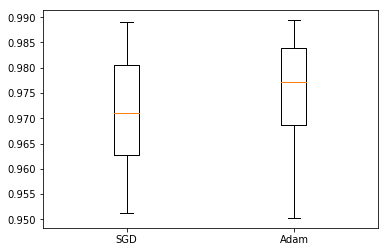

In [7]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
print(frecord.shape)
#box plot
index = name2index['optim_type']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['SGD','Adam'])

(155, 7)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fab019726a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab01972d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab01972550>,
 'medians': [<matplotlib.lines.Line2D at 0x7fab01979400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab01979748>,
 'means': []}

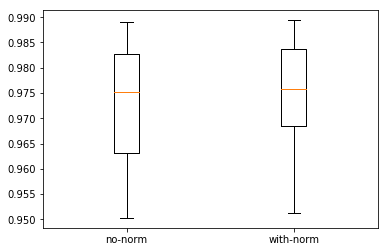

In [8]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
print(frecord.shape)
#box plot
index = name2index['norm_flag']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['no-norm','with-norm'])

(155, 7)


Text(0.5, 0, '$\\lambda$')

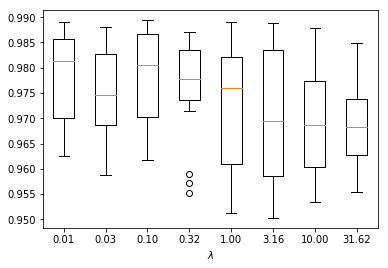

In [10]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
#filtered out non layer-norm
#frecord = frecord[frecord[:,name2index['norm_flag']]==1]
print(frecord.shape)
#box plot
index = name2index['lam']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['%.2f'%v for v in values])
plt.xlabel('$\lambda$')

(155, 7) [1.00000000e-03 1.00000000e+00 3.16227766e+02 1.00000000e-01
 2.00000000e+00 1.00000000e+00 9.89400000e-01]


Text(0.5, 0, '$\\gamma$')

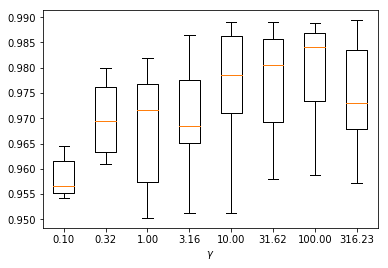

In [12]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
#filtered out non layer-norm
#frecord = frecord[frecord[:,name2index['norm_flag']]==1]
print(frecord.shape,frecord[np.argmax(frecord[:,-1])])
#box plot
index = name2index['gamma']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['%.2f'%v for v in values])
plt.xlabel('$\gamma$')

(75, 7) [1.00000000e-03 1.00000000e+00 3.16227766e+02 1.00000000e-01
 2.00000000e+00 1.00000000e+00 9.89400000e-01]


{'whiskers': [<matplotlib.lines.Line2D at 0x7fab01550c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab01559320>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab01550b00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fab015599b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab01559cf8>,
 'means': []}

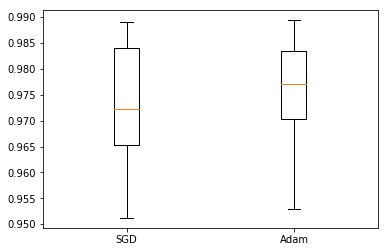

In [13]:
#filtered out low accuracies
frecord = record[record[:,-1]>=0.95]
#filtered out non gfusedmax
frecord = frecord[frecord[:,name2index['max_type']]==2]
#filtered out non layer-norm
frecord = frecord[frecord[:,name2index['norm_flag']]==1]
print(frecord.shape,frecord[np.argmax(frecord[:,-1])])
#box plot
index = name2index['optim_type']
values = list(set(frecord[:,index]))
values.sort()
plt.boxplot([frecord[frecord[:,index]==v][:,-1] for v in values],labels=['SGD','Adam'])